In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

In [7]:
# Select the relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [8]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Determine the optimal number of clusters
from sklearn.metrics import silhouette_score
sil_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(sil_score)

C:\Users\vslkm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vslkm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vslkm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vslkm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

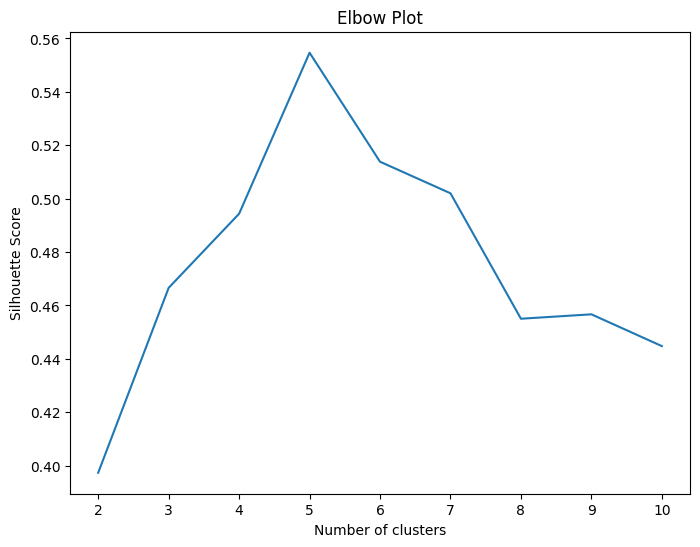

In [10]:
# Visualize the elbow plot to determine the optimal number of clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Plot')
plt.show()

In [11]:
# Apply K-Means clustering with the optimal number of clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

C:\Users\vslkm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [12]:
# Assign cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Analyze the clusters
for cluster in range(n_clusters):
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster].describe())
    print()

Cluster 0:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000           81.000000               81.000000   
mean    86.320988  42.716049           55.296296               49.518519   
std     24.240889  16.447822            8.988109                6.530909   
min     44.000000  18.000000           39.000000               34.000000   
25%     66.000000  27.000000           48.000000               44.000000   
50%     86.000000  46.000000           54.000000               50.000000   
75%    106.000000  54.000000           62.000000               55.000000   
max    143.000000  70.000000           76.000000               61.000000   

       Cluster  
count     81.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

Cluster 1:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   39.000000  39.000000           39.000000               